In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv('DataSet/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df = pd.read_csv('DataSet/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
all_df = pd.concat([train_df, test_df], ignore_index = True)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
#impluting missing vlaue
all_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
all_df['Age'].fillna(all_df['Age'].median(), axis = 0,inplace = True)
all_df['Fare'].fillna(all_df['Fare'].median(), axis = 0, inplace = True)
all_df['Cabin'].fillna('NA', axis = 0, inplace = True)
all_df['Embarked'].fillna(all_df['Embarked'].mode()[0], axis = 0,inplace = True)

In [11]:
#Variable Identification and Typecasting
all_df.dtypes[(all_df.dtypes == 'float64') | (all_df.dtypes == 'int64')]

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [12]:
# Age belongs to integer datatype
all_df['Age'] = all_df['Age'].astype('int64')

#Pclass belongs to categorical datatype
all_df['Pclass'] = all_df['Pclass'].astype('category')

In [13]:
all_df.dtypes[all_df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [14]:
all_df['Sex'] = all_df['Sex'].astype('category')
all_df['Cabin'] = all_df['Cabin'].astype('category')
all_df['Embarked'] = all_df['Embarked'].astype('category')

In [15]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1309 non-null   int64   
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        1309 non-null   category
 11  Embarked     1309 non-null   category
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 94.2+ KB


In [16]:
#Feature Engineering and EDA
# Family size is the number of people tarvelling together.
all_df['FamilySize'] = all_df.apply(lambda x : x['SibSp'] + x['Parch'] + 1, axis = 1)
all_df['FamilySize'] = all_df['FamilySize'].astype('int64')

# IsAlone identifies if the person in travelling alone.
all_df['IsAlone'] = all_df['FamilySize'].map(lambda x : 'Y' if x == 1 else 'N')
all_df['IsAlone'] = all_df['IsAlone'].astype('category')

# Now no need for the SibSp and Parch attributes
all_df.drop(columns = ['SibSp', 'Parch'],axis = 1,  inplace = True)

#Title extracted from Name, as name itself is irrelevant for us.
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

all_df['Title'] = all_df['Name'].apply(get_title)
all_df['Title'] = all_df['Title'].astype('category')

all_df.drop(columns = ['Name', 'Ticket'], inplace = True)

In [17]:
all_df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Mme.           1
Capt.          1
Lady.          1
Jonkheer.      1
Dona.          1
Don.           1
Countess.      1
Sir.           1
Name: Title, dtype: int64

In [18]:
all_df['Title'] = all_df['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all_df['Title'] = all_df['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all_df['Title'] = all_df['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all_df['Title'] = all_df['Title'].replace(['Mme.'], 'Mrs.')
all_df['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [19]:
all_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,male,22,7.2500,NA,S,2,N,Mr.
1,2,1.0,1,female,38,71.2833,C85,C,2,N,Mrs.
2,3,1.0,3,female,26,7.9250,NA,S,1,Y,Miss.
3,4,1.0,1,female,35,53.1000,C123,S,2,N,Mrs.
4,5,0.0,3,male,35,8.0500,NA,S,1,Y,Mr.


In [20]:
# custom function for easy and efficient analysis of numerical variables
def UVA_numeric(data, var):
  '''
  Numerical univariate Analysis
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  plt.figure(figsize = (7,3), dpi = 100)
    
  # calculating descriptives of variable
  mini = data[var].min()
  maxi = data[var].max()
  ran = data[var].max()-data[var].min()
  mean = data[var].mean()
  median = data[var].median()
  st_dev = data[var].std()
  skew = data[var].skew()
  kurt = data[var].kurtosis()

  # calculating points of standard deviation
  points = mean-st_dev, mean+st_dev

  #Plotting the variable with every information
  plt.subplot(1,2,1)
  sns.kdeplot(data[var], shade=True)
  sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
  sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
  sns.scatterplot([mean], [0], color = 'red', label = "mean")
  sns.scatterplot([median], [0], color = 'blue', label = "median")
  plt.xlabel('{}'.format(var), fontsize = 20)
  plt.ylabel('density')
  plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
  plt.subplot(1,2,2)
  plt.boxplot(data[var])



def gaussianTransformationVisual(data, feature, transformation):
    
    '''
    Plots visual after applying Guassian Transformation on numerical variable.
    Takes feature and transformation type, returns visual after applying transformation.
    '''
    def plotVisual(data,transformation):
        plt.figure(figsize = (5,2), dpi = 100)
        plt.subplot(1,2,1)
        sns.kdeplot(data, shade = True)
        plt.title(transformation)
        plt.subplot(1,2,2)
        stat.probplot(data,dist='norm',plot=pylab)
        
    if transformation == 'normal':
        plotVisual(data[feature], transformation)
    elif transformation == 'logarithmic':
        plotVisual(np.log1p(data[feature]), transformation)
    elif transformation == 'squareroot':
        plotVisual(np.sqrt(data[feature]), transformation)
    elif transformation == 'reciprocal':
        plotVisual(1/data[feature], transformation)
    elif transformation == 'exponential':
        plotVisual(data[feature]**(1/1.2), transformation)
        
        
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var):

  '''
  Categorical Univariate Analysis
  Takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  plt.figure(figsize = (5,3), dpi = 100)

  norm_count = data[var].value_counts(normalize = True)
  n_uni = data[var].nunique()

  #Plotting the variable with every information
  plt.figure(figsize = (7,3) ,dpi = 100)

  plt.subplot(1,2,1)
  sns.barplot(norm_count.index ,norm_count, order = norm_count.index)
  plt.ylabel('fraction/percent', fontsize = 20)
  plt.xlabel(var, fontsize = 20)
  plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
 
  plt.subplot(1,2,2)
  sns.countplot(data[var], hue = data['Survived'])
  plt.xlabel(var, fontsize = 20)
  plt.ylabel('count', fontsize = 20)
  plt.title('{}'.format(pd.crosstab(data[var], data['Survived'])))
    
    
#function to plot numeric variables against categorical variables
def BVA_num_cat(data, cont, cat,log = False):
    
  '''
  Categorical-Numerical bivariate analysis.
  Takes continues and categorical features as input.
  '''
  plt.figure(figsize = (7,3), dpi=100)
  plt.subplot(1,2,1)
  sns.barplot(data[cat], data[cont])
  table = pd.pivot_table(data = data , values = cont , columns= cat ,aggfunc= np.mean)
  plt.title('{}'.format(table))

  plt.subplot(1,2,2)
  sns.boxplot(data[cat], data[cont])
  if log:
    plt.yscale(value = 'log')
    
def outlier_removal_iqr(df, var):
    
    '''
    Remove outlier based on IQR method.
    Takes numerical variable and outliers be brought in range(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    '''
    per_25 = df[var].quantile(0.25)
    per_75 = df[var].quantile(0.75)
    iqr = per_75 - per_25
    upper_lim = per_75 + 1.5 * iqr
    lower_lim = per_25 - 1.5 * iqr 

    df[var] = df[var].map(lambda x :  upper_lim if x > upper_lim  else lower_lim if x < lower_lim else x)
    return df

In [21]:
for attr in list(filter(lambda feature : all_df[feature].dtype in ['int64', 'float64'], all_df.columns)):
    print(attr)

PassengerId
Survived
Age
Fare
FamilySize


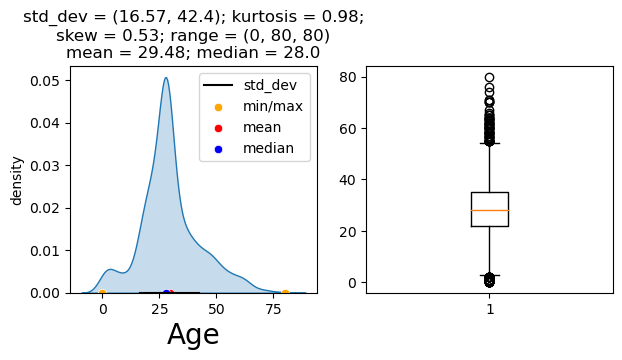

In [22]:
UVA_numeric(all_df, 'Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

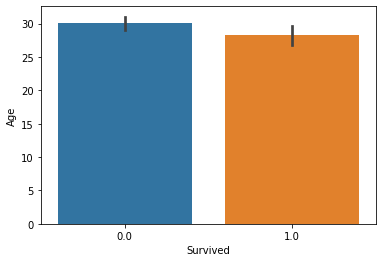

In [23]:
sns.barplot(x = 'Survived', y ='Age', data = all_df)

In [25]:
#Summary:

# About 68% travellers were aged between 16 and 42.
# Younger people had slightly better chance of survival
# Things to be done at later stage:

# Age binning
#Fare

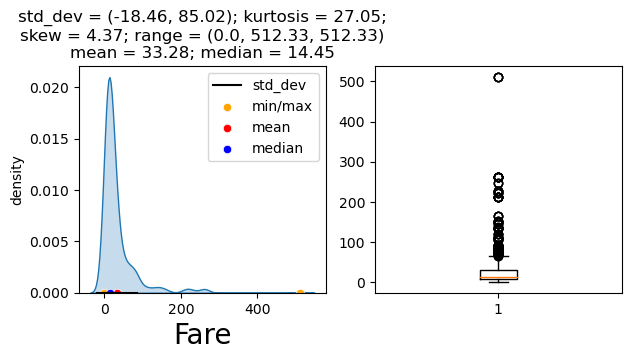

In [26]:
UVA_numeric(all_df, 'Fare')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

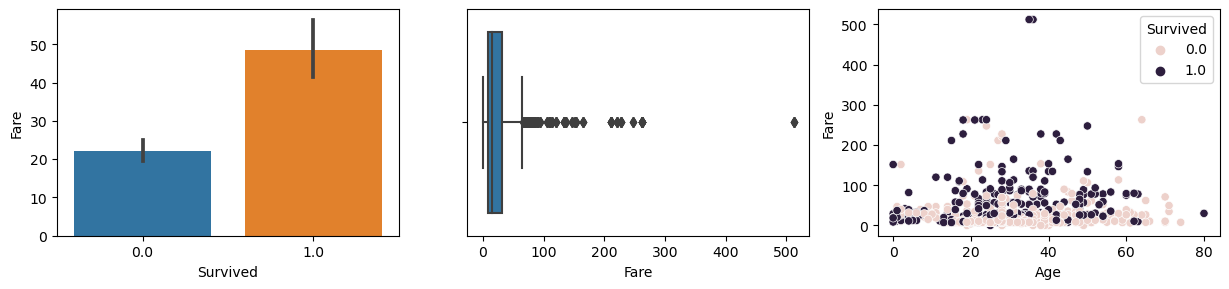

In [27]:
plt.figure(figsize = (15,3), dpi = 100)

plt.subplot(1,3,1)
sns.barplot(x = 'Survived', y ='Fare', data = all_df)

plt.subplot(1,3,2)
sns.boxplot(all_df['Fare'])

plt.subplot(1,3,3)
sns.scatterplot(x = 'Age', y = 'Fare', hue = 'Survived', data = all_df)

In [ ]:
# Summary:

# Mostly travellers spent less than 85 bucks as ticket price.
# Survival rate of travellers with higher fare was more as compared to travellers with lower fare.
# It is evident from scatterplot that infants and children were given more priority to be saved. Also for travellers aged between 20 - 60 having expensive tickets had more chance of survival as compared to travellers with cheaper tickets.
# Things to be done at later stage:

# Since Fare is right skewed(skewness : 4.37), we need to apply Guassian transformations (particularly Log transformation) to convert it into Normal distribution
# We need to treat outlier for Fare.

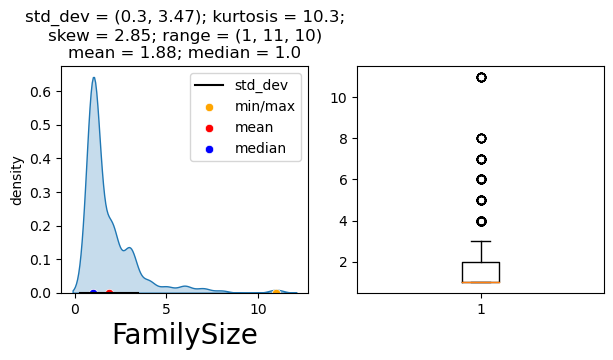

In [28]:
#Family Size
UVA_numeric(all_df, 'FamilySize')

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

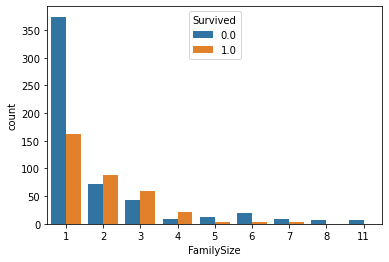

In [29]:
sns.countplot('FamilySize', hue = 'Survived', data = all_df)

In [30]:
pd.crosstab(all_df['FamilySize'], all_df['Survived'])

Survived,0.0,1.0
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [ ]:
# Summary:

# Majority of the tarvellers were travelling alone.
# Those who were travelling with fmaily had lower chances of survival.

In [31]:
#Categorical Variables
for attr in list(filter(lambda feature : all_df[feature].dtype in ['category'], all_df.columns)):
    print(attr)

Pclass
Sex
Cabin
Embarked
IsAlone
Title


<Figure size 500x300 with 0 Axes>

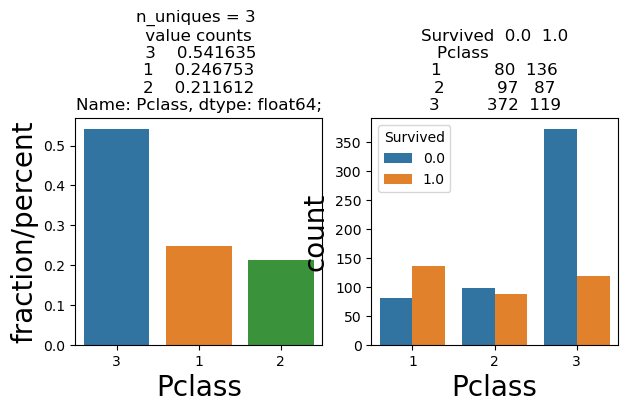

In [32]:
#Pclass
UVA_category(all_df, 'Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

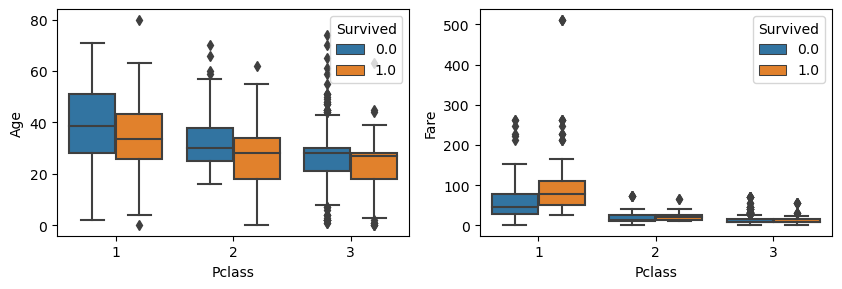

In [33]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' ,x = 'Pclass' ,hue = 'Survived',data = all_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Fare' ,x = 'Pclass' ,hue = 'Survived',data = all_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

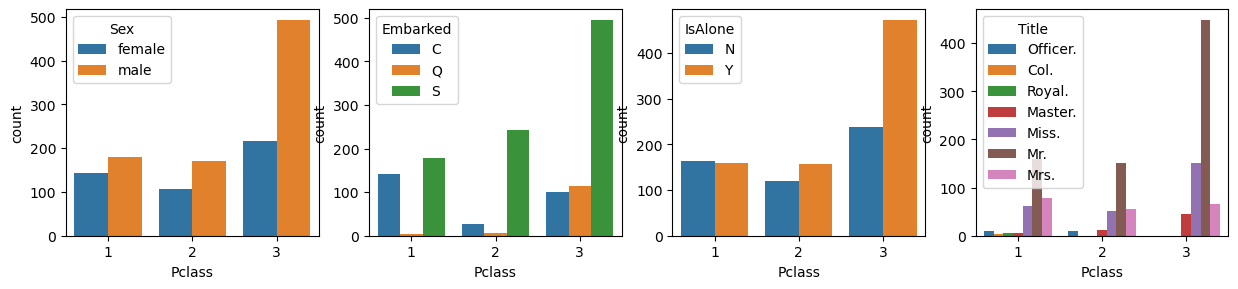

In [34]:
plt.figure(figsize = (15,3), dpi = 100)

plt.subplot(1,4,1)
sns.countplot(x = 'Pclass' ,hue = 'Sex',data = all_df)

plt.subplot(1,4,2)
sns.countplot(x = 'Pclass' ,hue = 'Embarked',data = all_df)

plt.subplot(1,4,3)
sns.countplot(x = 'Pclass' ,hue = 'IsAlone',data = all_df)

plt.subplot(1,4,4)
sns.countplot(x = 'Pclass', hue = 'Title', data = all_df)

In [ ]:
# Summary:

# Mostly on-boarded people were travelling in the cheapest class i.e. third class. More people were travelling in the first class as compared to the second class.
# Though more number of people were travelling third class, still the survivors were more from the elite class. Also travellers that died were mostly from the lowest class.
# More number of older people were travelling in first class. Survival rate for people in first class with greater fare was higher.
# More travellers embarked from Queenstown in class 3 as compared to other classes.
# There were more solo travellers in Class 3, for other classes the ratio is nearly equal.

<Figure size 500x300 with 0 Axes>

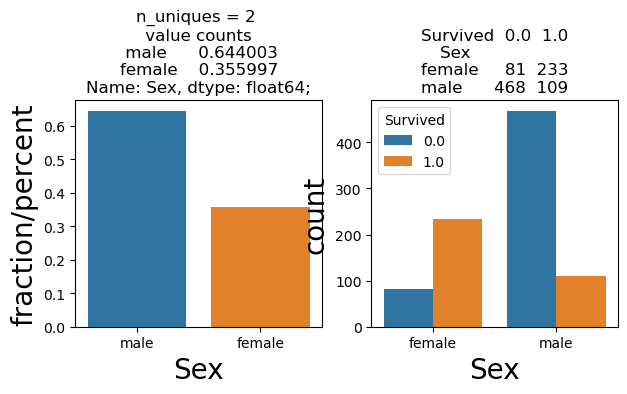

In [35]:
#Sex
UVA_category(all_df, 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

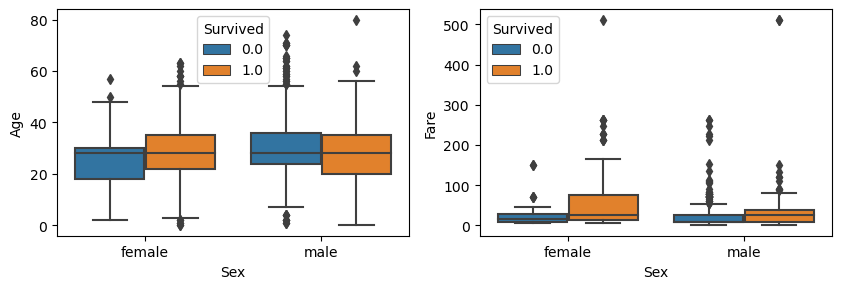

In [36]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' ,x = 'Sex' ,hue = 'Survived',data = all_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Fare' ,x = 'Sex' ,hue = 'Survived',data = all_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

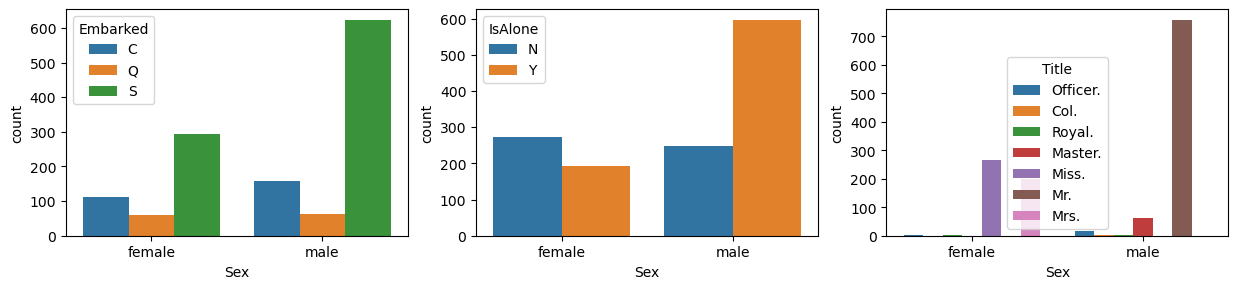

In [37]:
plt.figure(figsize = (15,3), dpi = 100)

plt.subplot(1,3,1)
sns.countplot(x = 'Sex' ,hue = 'Embarked',data = all_df)

plt.subplot(1,3,2)
sns.countplot(x = 'Sex' ,hue = 'IsAlone',data = all_df)

plt.subplot(1,3,3)
sns.countplot(x = 'Sex', hue = 'Title', data = all_df)

In [ ]:
# Summary:

# Around 64% travellers were male.
# Survival rate of female travellers was very high as compared to male travellers.
# Older female travellers tend to have better survival rate as opposed to male travellers, where slightly younger males have better survival chances.
# More females were travelling with family while more number of males were travelling alone.
# Things to be done at a later stage:

# Since Sex is a nominal variable, one hot encoding needs to be perfomed.

<Figure size 500x300 with 0 Axes>

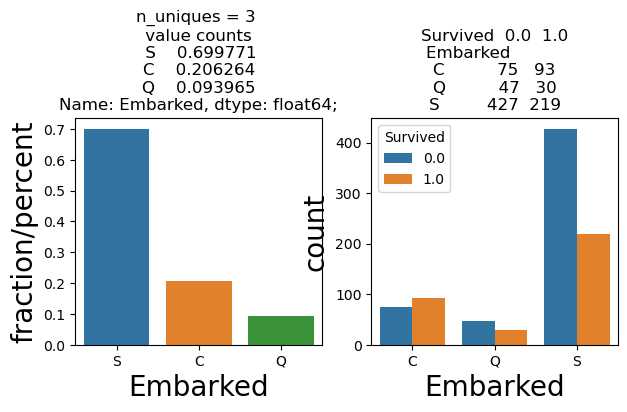

In [38]:
UVA_category(all_df, 'Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

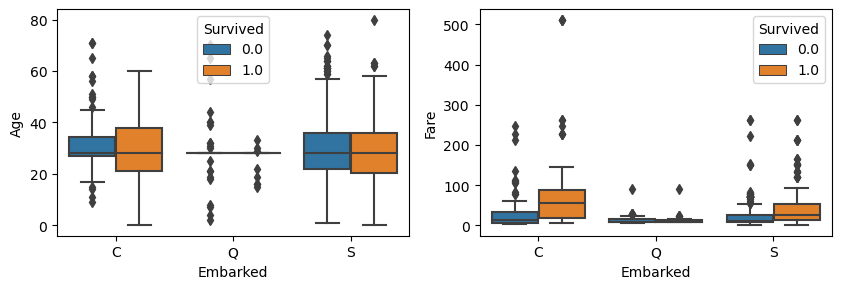

In [39]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' ,x = 'Embarked' ,hue = 'Survived',data = all_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Fare' ,x = 'Embarked' ,hue = 'Survived',data = all_df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

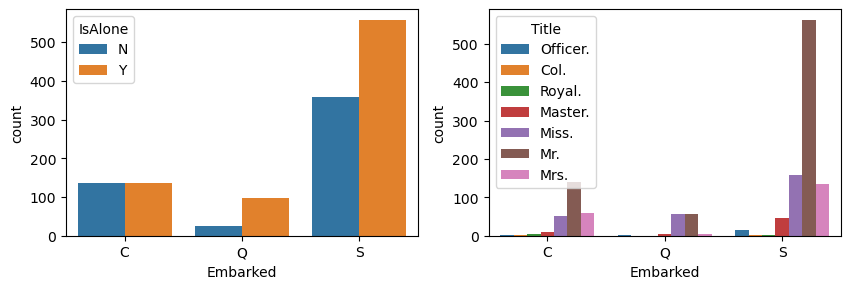

In [40]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.countplot(x = 'Embarked' ,hue = 'IsAlone',data = all_df)

plt.subplot(1,2,2)
sns.countplot(x = 'Embarked' ,hue = 'Title',data = all_df)

In [ ]:
# Summary:

# About 70% travellers emabarked the ship from Southampton.
# More number of survivors were from Southampton as majority of the travellers were from there.
# Almost equal ratio of travellers embarked with families as alone from Cherbourg. Where as from Queenstown and Southampton, more number of people were travelling alone.
# Things to be done at a later stage:

# Since Embarked is a nominal variable, one hot encoding needs to be perfomed.

<Figure size 500x300 with 0 Axes>

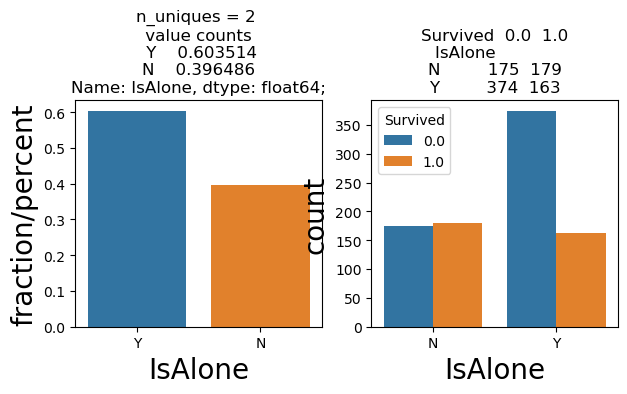

In [41]:
#IsAlone
UVA_category(all_df, 'IsAlone')

<AxesSubplot:xlabel='IsAlone', ylabel='Fare'>

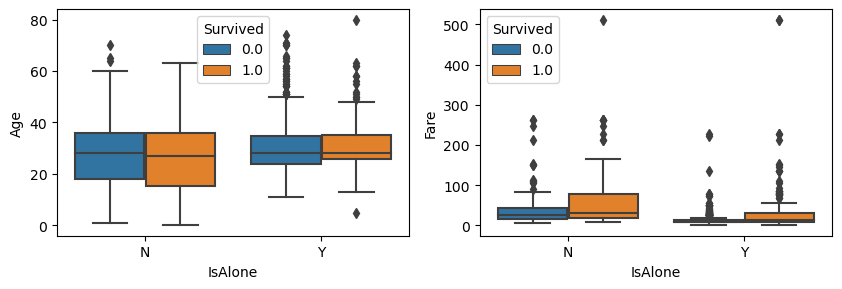

In [42]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' ,x = 'IsAlone' ,hue = 'Survived',data = all_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Fare' ,x = 'IsAlone' ,hue = 'Survived',data = all_df)

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

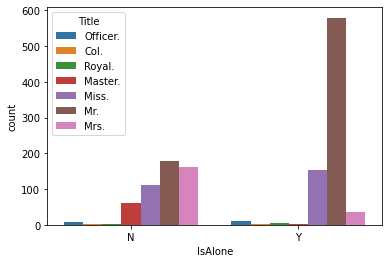

In [43]:
sns.countplot(x = 'IsAlone', hue = 'Title', data = all_df)

In [ ]:
# Summary:

# More number of people were travelling alone.
# People travelling with family had better survival chance as compared to people travelling alone. This is due to the fact that children with their mothers were given priority instead of males.
# Things to be done at a later stage:

# Since IsAlone is a nominal variable, one hot encoding needs to be perfomed.

<Figure size 500x300 with 0 Axes>

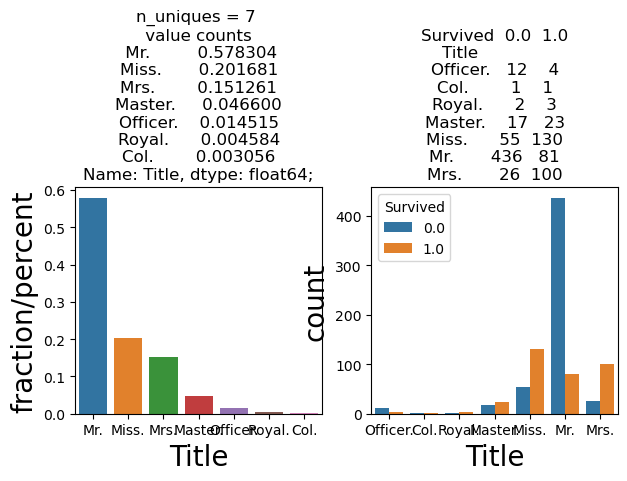

In [44]:
#Title
UVA_category(all_df, 'Title')

<AxesSubplot:xlabel='Title', ylabel='Fare'>

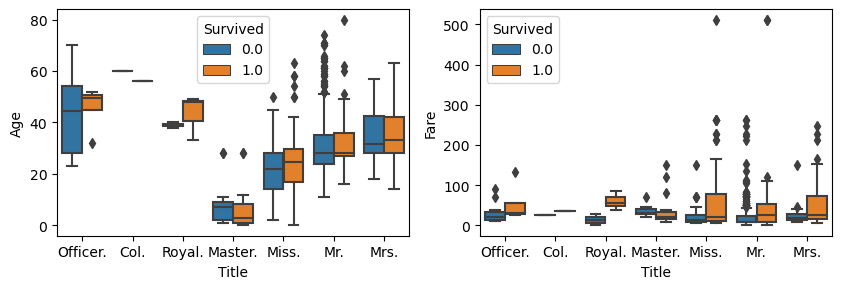

In [45]:
plt.figure(figsize = (10,3), dpi = 100)

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' ,x = 'Title' ,hue = 'Survived',data = all_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Fare' ,x = 'Title' ,hue = 'Survived',data = all_df)

In [ ]:
# Summary:

# There were a lot of general male passengers travelling. Most commmon title was Mr. among travellers.
# Though more males were travelling but priority was given to female passengers. Title Miss. and Mrs. were saved most. Travellers with title Mr. who were saved must be male children.
# Things to be done at a later stage:

# Since IsAlone is a nominal variable, one hot encoding needs to be perfomed.

In [46]:
#Feature Engineering
#Binning Age
age_bin_ranges = [-1, 15, 30, 45, 60,100]
age_bin_names = [1, 2, 3, 4, 5]

all_df['Age'] = pd.cut(all_df['Age'], bins = age_bin_ranges, labels = age_bin_names) 
all_df['Age'] = all_df['Age'].astype('int64')

#Log transformation for Fare(right skewed)
all_df['Fare'] = np.log1p(all_df['Fare'])

#Extracting first letter of Cabin
all_df['Cabin'] = all_df['Cabin'].map(lambda x : x[0] if x != 'NA' else 'NA')
all_df['Cabin'] = all_df['Cabin'].astype('category')

#One hot encoding for nominal categorical variables.
for var in ['Sex','Cabin','Embarked', 'IsAlone', 'Title']:
    all_df = pd.get_dummies(all_df, prefix = var, columns = [var], drop_first = True)

#Rounding Off Fare to 2 decimal digits
all_df['Fare'] = all_df['Fare'].round(2)

In [47]:
all_df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Cabin_B,Cabin_C,Cabin_D,...,Cabin_T,Embarked_Q,Embarked_S,IsAlone_Y,Title_Col.,Title_Royal.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.
0,1,0.0,3,2,2.11,2,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,1.0,1,3,4.28,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1.0,3,2,2.19,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,4,1.0,1,3,3.99,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,5,0.0,3,3,2.20,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [48]:
train_data = all_df[~(all_df['Survived'].isna())]
test_data = all_df[all_df['Survived'].isna()]

train_data.shape[0], test_data.shape[0]

(891, 418)

In [49]:
X = train_data.drop(columns = ['Survived','PassengerId'])
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
X_train.shape[0], X_test.shape[0]

(712, 179)

In [50]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)

Text(24.0, 0.5, 'Predicted Values')

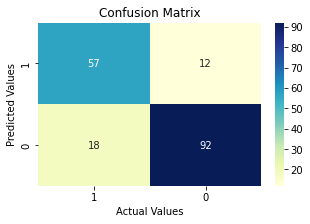

In [52]:
#confusion matrix
tn, fp , fn, tp = confusion_matrix(y_test, y_pred).ravel()

plt.figure(figsize = (5,3)) 
sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0], yticklabels = [1,0], annot = True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [53]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(y_test, y_pred))
print('Recall score : ',recall_score(y_test, y_pred))
print('Precision score : ',precision_score(y_test, y_pred))
print('F1 score : ',f1_score(y_test, y_pred))

Accuracy score :  0.8324022346368715
Recall score :  0.76
Precision score :  0.8260869565217391
F1 score :  0.7916666666666667


In [54]:
print(f'Test : {lr.score(X_test, y_test):.3f}')
print(f'Train : {lr.score(X_train, y_train):.3f}')

Test : 0.832
Train : 0.843


In [55]:
#Random Forest
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=10, n_jobs=-1)

In [57]:
y_pred_rf = rf.predict(X_test)

Text(24.0, 0.5, 'Predicted Values')

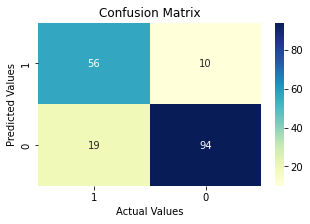

In [58]:
#confusion matrix
tn, fp , fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()

plt.figure(figsize = (5,3)) 
sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0], yticklabels = [1,0], annot = True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [59]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(y_test, y_pred_rf))
print('Recall score : ',recall_score(y_test, y_pred_rf))
print('Precision score : ',precision_score(y_test, y_pred_rf))
print('F1 score : ',f1_score(y_test, y_pred_rf))

Accuracy score :  0.8379888268156425
Recall score :  0.7466666666666667
Precision score :  0.8484848484848485
F1 score :  0.7943262411347518


In [60]:
print(f'Test : {rf.score(X_test, y_test):.3f}')
print(f'Train : {rf.score(X_train, y_train):.3f}')

Test : 0.838
Train : 0.871


In [61]:
#Validation
test_data.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Cabin_B,Cabin_C,Cabin_D,...,Cabin_T,Embarked_Q,Embarked_S,IsAlone_Y,Title_Col.,Title_Royal.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.
891,892,NaN,3,3,2.18,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
892,893,NaN,3,4,2.08,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
893,894,NaN,2,5,2.37,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
894,895,NaN,3,2,2.27,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
895,896,NaN,3,2,2.59,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
test_data.drop(columns = ['PassengerId', 'Survived'], inplace = True)

In [63]:
test_pred = rf.predict(test_data)